# Big data mart sales

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

In [210]:
import pandas as pd
df_train=pd.read_csv("bigmart_train.csv")
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [211]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [212]:
df_train.shape

(8523, 12)

In [213]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [214]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

we shall with these null values further

In [215]:
#finding unique values in each column
df_train.nunique(axis=0) 

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

#### cheking what are the unique values and their frequencies

In [216]:
df_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [217]:
#counting the frequency of each category
df_train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

#### we can clearly say that 'Lf' and 'Reg' basically represents Low Fat and Regular fat content so we should map them for our convenience

In [218]:
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
df_train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [219]:
df_train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [220]:
df_train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [221]:
df_train['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [222]:
df_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [223]:
df_train['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [224]:
df_train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [225]:
df_train['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [226]:
df_train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [227]:
df_train['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

let us convert the establishment year into number of years 

# Handling the null values

1)Item weight : the item weight is itendified by "Item Identifier" so we will replace null values in item weight by grouping the item

In [228]:
#fill nan with the mean
df_train["Item_Weight"]=df_train["Item_Weight"].mean()

In [229]:
df_train["Item_Weight"].isnull().sum()

0

In [230]:
#checking the mode of outlet size
df_train["Outlet_Size"].mode()

0    Medium
dtype: object

In [231]:
# Filling the null values with the mode value
df_train['Outlet_Size'].fillna('Medium', inplace=True)
df_train['Outlet_Size'].isnull().sum()

0

In [232]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#### Thus we have cleared all the null values successfully

we can see the item visibility for certain entries is 0,but as the items are being sold the visibility cannot be 0 therefore we will fill these values with mean value

In [233]:
df_train["Item_Visibility"]=df_train["Item_Visibility"].replace(0,df_train["Item_Visibility"].mean())

In [234]:
df_train["Item_Visibility"]

0       0.016047
1       0.019278
2       0.016760
3       0.066132
4       0.066132
          ...   
8518    0.056783
8519    0.046982
8520    0.035186
8521    0.145221
8522    0.044878
Name: Item_Visibility, Length: 8523, dtype: float64

# EDA

In [235]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [236]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

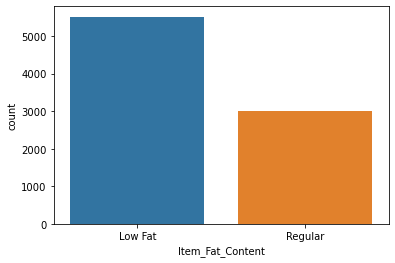

In [237]:
sns.countplot(df_train['Item_Fat_Content'])
plt.show()

Low Fat=5517

Regular=3006

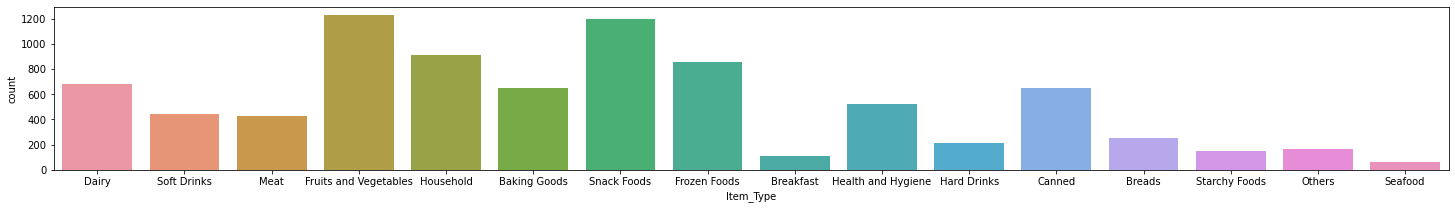

In [238]:
plt.figure(figsize=(25,3))
sns.countplot(df_train["Item_Type"])
plt.show()

Fruits and Vegetables" and "Snack Foods" are sold the most

Household and Frozen Foods are seld on medium scale 

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856

The sales of seafood is least(minimum) =64


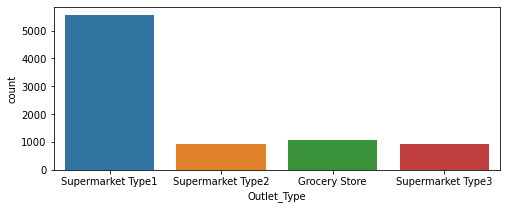

In [239]:
plt.figure(figsize=(8,3))
sns.countplot(df_train["Outlet_Type"])
plt.show()

most of the items belong to supermarket type 1

Supermarket Type1=5577

Grocery Store=1083

Supermarket Type3=935

Supermarket Type2=938

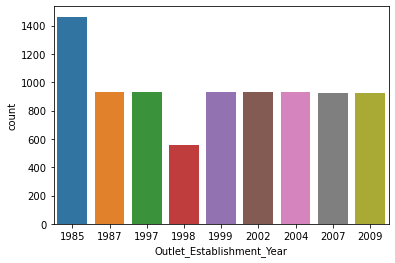

In [240]:
sns.countplot(df_train['Outlet_Establishment_Year'])
plt.show()

most of the outlets were established in 1985 while the least were in 1998

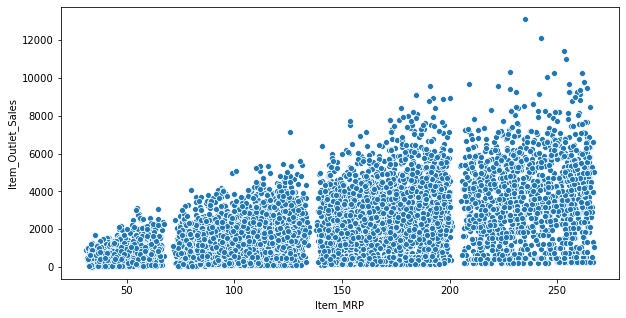

In [241]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df_train['Item_MRP'],y=df_train['Item_Outlet_Sales'])
plt.show()

the mrps are found in dense group

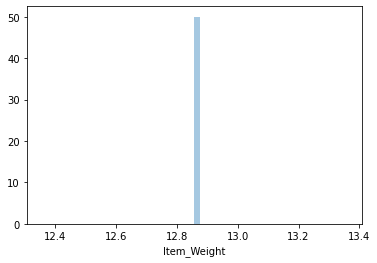

In [242]:
sns.distplot(df_train["Item_Weight"])
plt.show()

There is no normal distribution for the data

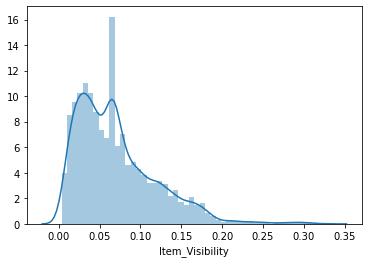

In [243]:
sns.distplot(df_train['Item_Visibility'])
plt.show()

The data is right skew with some peak values

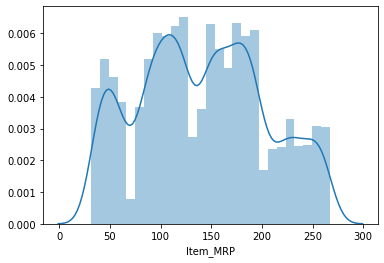

In [244]:
sns.distplot(df_train['Item_MRP'])
plt.show()

we can see abnormalities in the data

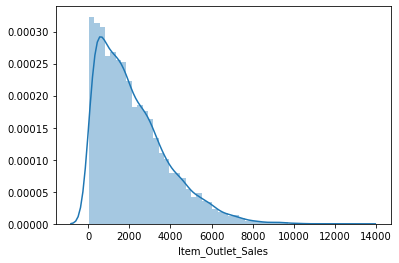

In [245]:
sns.distplot(df_train['Item_Outlet_Sales'])
plt.show()

The data is right skewed

In [246]:
df_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [247]:
#droping Outlet_Establishment_Year  
df_train.drop(["Outlet_Establishment_Year"],axis=1,inplace=True)
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,12.857645,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,12.857645,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,12.857645,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,12.857645,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,12.857645,Low Fat,0.066132,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052


# Correlation

In [248]:
df_train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Weight,1.000000e+00,2.827070e-15,1.542215e-15,2.497101e-15
Item_Visibility,2.827070e-15,1.000000e+00,-5.258908e-03,-1.341377e-01
Item_MRP,1.542215e-15,-5.258908e-03,1.000000e+00,5.675744e-01
Item_Outlet_Sales,2.497101e-15,-1.341377e-01,5.675744e-01,1.000000e+00


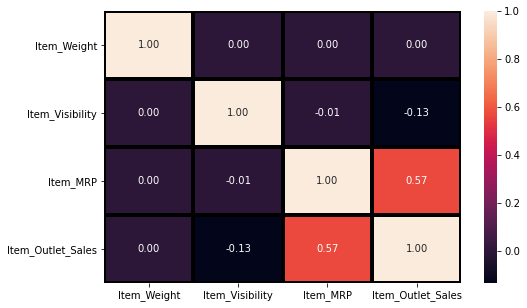

In [249]:
plt.figure(figsize=(8,5))
sns.heatmap(df_train.corr(),annot=True,linewidth=3,linecolor='black',fmt="0.2f")
plt.show()

#### Observations

"Item MRP" has the highest correlation with target variable

"Item weight" has the least correlation with target variable

"item visibility" has negative correlation with the target variable

In [250]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8.523000e+03,8523.000000,8523.000000,8523.000000
mean,1.285765e+01,0.070213,140.992782,2181.288914
std,1.563286e-13,0.048742,62.275067,1706.499616
min,1.285765e+01,0.003575,31.290000,33.290000
25%,1.285765e+01,0.033085,93.826500,834.247400
50%,1.285765e+01,0.062517,143.012800,1794.331000
75%,1.285765e+01,0.094585,185.643700,3101.296400
max,1.285765e+01,0.328391,266.888400,13086.964800


The values of mean and median are approximately similar so we can say it has symmetrical distribution 

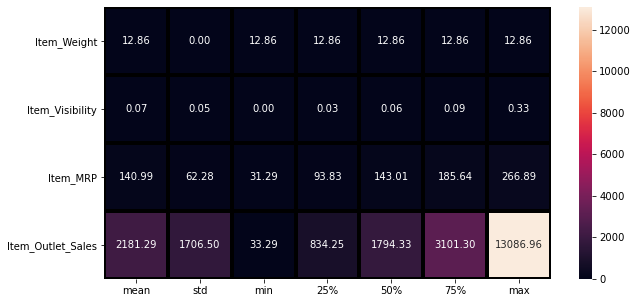

In [251]:
plt.figure(figsize=(10,5))
sns.heatmap(round(df_train.describe()[1:].transpose(),2),annot=True,linewidth=3,linecolor='black',fmt="0.2f")
plt.show()

The standard deviation is very high for Item_Outlet_sales and Item_MRP

There is no much difference between the mean and medians(50%) of the data

For Item_Weight and Item_visibility here is no difference between (min and 25th percentile)and the 75th percentile and max value  so we can say that there are no outliers present here

# outlier detection

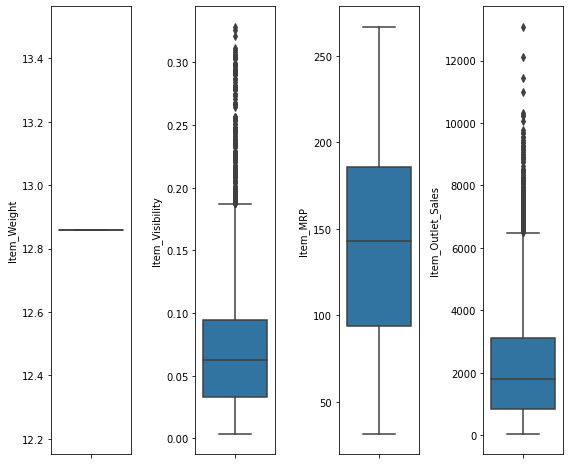

In [252]:
cols=["Item_Weight","Item_Visibility","Item_MRP","Item_Outlet_Sales"]

ncols=30
nrows=14
plt.figure(figsize=(2*ncols,3*ncols))

for i in range(0,len(cols)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(df_train[cols[i]],orient='v')
    plt.tight_layout()

There are no outliers in "item weight" and item outlet MRP

Item visibilty and item outlet sales suffer from outliers

In [253]:
df_train.skew()

Item_Weight          0.000000
Item_Visibility      1.286877
Item_MRP             0.127202
Item_Outlet_Sales    1.177531
dtype: float64

item visibility has a negative correlation with target varibale and high skewness so it should be dropped

"Item_Identifier","Outlet_Identifier" should be dropped as there is no effect of the identification numbers on the target variable

In [254]:
df_train.drop(["Item_Identifier","Item_Visibility","Outlet_Identifier"],axis=1,inplace=True)
df_train.sample()

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
6009,12.857645,Low Fat,Canned,249.5092,Medium,Tier 3,Supermarket Type2,2241.0828


#### As we need numerical values for model building let us perform label encoding on the remaining features

# Label encoding

In [255]:
from sklearn.preprocessing import LabelEncoder

mylist=["Item_Fat_Content","Item_Type","Outlet_Size","Outlet_Location_Type","Outlet_Type"]

for j in mylist:
    Le=LabelEncoder()
    Le.fit(df_train[j])
    df_train[j]=Le.fit_transform(df_train[j])
    

In [256]:
df_train

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,12.857645,0,4,249.8092,1,0,1,3735.1380
1,12.857645,1,14,48.2692,1,2,2,443.4228
2,12.857645,0,10,141.6180,1,0,1,2097.2700
3,12.857645,1,6,182.0950,1,2,0,732.3800
4,12.857645,0,9,53.8614,0,2,1,994.7052
...,...,...,...,...,...,...,...,...
8518,12.857645,0,13,214.5218,0,2,1,2778.3834
8519,12.857645,1,0,108.1570,1,1,1,549.2850
8520,12.857645,0,8,85.1224,2,1,1,1193.1136
8521,12.857645,1,13,103.1332,1,2,2,1845.5976


#### Assinging target and features 

In [257]:
x=df_train.drop(["Item_Outlet_Sales"],axis=1)
x

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,12.857645,0,4,249.8092,1,0,1
1,12.857645,1,14,48.2692,1,2,2
2,12.857645,0,10,141.6180,1,0,1
3,12.857645,1,6,182.0950,1,2,0
4,12.857645,0,9,53.8614,0,2,1
...,...,...,...,...,...,...,...
8518,12.857645,0,13,214.5218,0,2,1
8519,12.857645,1,0,108.1570,1,1,1
8520,12.857645,0,8,85.1224,2,1,1
8521,12.857645,1,13,103.1332,1,2,2


In [258]:
#target variable for train dataset
y=df_train["Item_Outlet_Sales"]
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

#### using for loop to get best random state

In [259]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

best_rstate=0
accu=0

for i in range(30,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    tempaccu=r2_score(y_test,y_pred)
    
    
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i
        
        
print('Best accuracy is ',(accu*100),'found on random state',(best_rstate))

Best accuracy is  53.860633396679006 found on random state 119


# Data split

In [260]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=119)

Using for loop to understand various regression and their performance

In [261]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso,Ridge,ElasticNet

models=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),Ridge(),ElasticNet()]

for i in models:
    i.fit(x_train,y_train)
    pred_y=i.predict(x_test)
    print("for",i,"algorithm")
    print(f"r2 score is {r2_score(y_test,pred_y)*100}")
    cross_score=cross_val_score(i,x,y,cv=5).mean()*100
    print("cross validation score is",cross_score)
    print('\n')
    

for LinearRegression() algorithm
r2 score is 53.860633396679006
cross validation score is 50.41941458406913


for DecisionTreeRegressor() algorithm
r2 score is 10.768050762695747
cross validation score is 13.438810055466169


for KNeighborsRegressor() algorithm
r2 score is 34.371867008235846
cross validation score is 33.40551697857267


for Lasso() algorithm
r2 score is 53.84564130510403
cross validation score is 50.41993841081064


for Ridge() algorithm
r2 score is 53.85884800880339
cross validation score is 50.41952566727996


for ElasticNet() algorithm
r2 score is 47.26400392067123
cross validation score is 45.46636575132411




#### The Lasso reg.performs comparetively better lets hypertune it

# Hyperparameter tunning

In [262]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10,100],'random_state':list(range(0,10))}
Ls=Lasso()
clf=GridSearchCV(Ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [263]:
#making lasso reg.using the best parameters obtained above
Ls=Lasso(alpha=0.001,random_state=0)
Ls.fit(x_train,y_train)

    

Lasso(alpha=0.001, random_state=0)

# Saving the best Model

In [264]:
# Save the trained model as a pickle in a file 

import joblib
joblib.dump(Ls,'BigMartSales.pkl') 
  

['BigMartSales.pkl']

# Test Dataset Analysis and preparations

In [265]:
#importing test dataset
import pandas as pd
df_test=pd.read_csv("bigmart_test.csv")
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [266]:
df_test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

we can see here there is no target variable which we will be prdeicting 

In [267]:
df_test.shape

(5681, 11)

In [268]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [269]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [270]:
#fill nan values the mean and median
df_test["Item_Weight"]=df_test["Item_Weight"].mean()


In [271]:
df_test["Outlet_Size"].mode()

0    Medium
dtype: object

In [272]:
df_test['Outlet_Size'].fillna('Medium', inplace=True)


In [273]:
#check if the null values are replaced
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

#dropping the columns which were dropped in train data set

In [274]:
df_test.drop(['Item_Identifier','Item_Visibility','Outlet_Identifier','Outlet_Establishment_Year'],axis=1,inplace=True)
df_test.sample()

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
5249,12.695633,Low Fat,Fruits and Vegetables,191.8162,Small,Tier 1,Grocery Store


In [275]:
df_train.sample()

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7069,12.857645,0,4,262.2568,1,1,1,3954.852


#### Label encoding the data in test dataset

In [276]:
from sklearn.preprocessing import LabelEncoder

mylist2=["Item_Fat_Content","Item_Type","Outlet_Size","Outlet_Location_Type","Outlet_Type"]

for j in mylist2:
    Le=LabelEncoder()
    Le.fit(df_test[j])
    df_test[j]=Le.fit_transform(df_test[j])
    

In [277]:
df_test

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,12.695633,1,13,107.8622,1,0,1
1,12.695633,4,4,87.3198,1,1,1
2,12.695633,1,11,241.7538,1,2,0
3,12.695633,1,13,155.0340,1,1,1
4,12.695633,2,4,234.2300,1,2,3
...,...,...,...,...,...,...,...
5676,12.695633,2,13,141.3154,2,0,1
5677,12.695633,2,15,169.1448,1,2,2
5678,12.695633,1,8,118.7440,1,1,1
5679,12.695633,2,3,214.6218,1,1,1


In [278]:
#features of test dataset
test_dataset=df_test
test_dataset

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,12.695633,1,13,107.8622,1,0,1
1,12.695633,4,4,87.3198,1,1,1
2,12.695633,1,11,241.7538,1,2,0
3,12.695633,1,13,155.0340,1,1,1
4,12.695633,2,4,234.2300,1,2,3
...,...,...,...,...,...,...,...
5676,12.695633,2,13,141.3154,2,0,1
5677,12.695633,2,15,169.1448,1,2,2
5678,12.695633,1,8,118.7440,1,1,1
5679,12.695633,2,3,214.6218,1,1,1


# predicting the values

#### using the tarined model to predict our test dataset

In [279]:
model_from_joblib=joblib.load("BigMartSales.pkl") #import the trained model

#using this trained model to predict

predictions=model_from_joblib.predict(test_dataset)
predictions

array([2028.74951537, 1490.47255794, 2275.80858983, ..., 1773.6638243 ,
       3309.44224161, 1230.96048436])

In [280]:
#view the predictions in tabular format
predicted=pd.DataFrame({"Item_Outlet_sales":predictions})
predicted

,Item_Outlet_sales
0,2028.749515
1,1490.472558
2,2275.808590
3,2345.877200
4,5187.729879
...,...
5676,2298.378612
5677,3220.691023
5678,1773.663824
5679,3309.442242
